In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

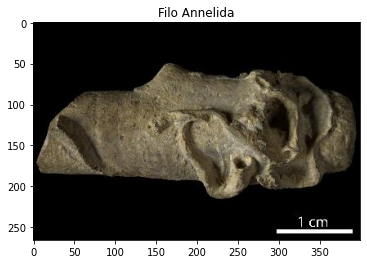

In [ ]:
img = cv.imread("/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Annelida/Annelida_Img_001206.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.title("Filo Annelida")
plt.imshow(img)

##Histograma de cores

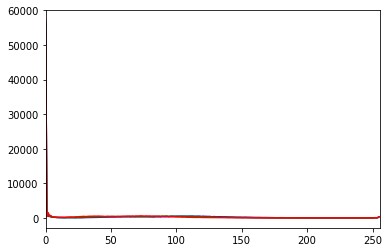

In [ ]:
color = ( 'b' , 'g' , 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show ()

##Remoção de Ruído

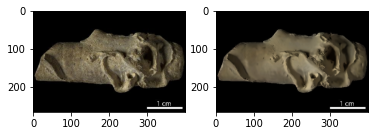

In [ ]:
teste = cv.fastNlMeansDenoisingColored(img, None , 10,10,7,21)
sem_ruido = cv.fastNlMeansDenoisingColored(img, None , 10,10,7,21)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(teste)
plt.show()

##Detecção de Cantos

In [ ]:
cinza = cv.cvtColor(teste, cv.COLOR_BGR2GRAY)
cinza = np.float32(cinza)
canto = cv.cornerHarris(cinza, 2,3,0.04)

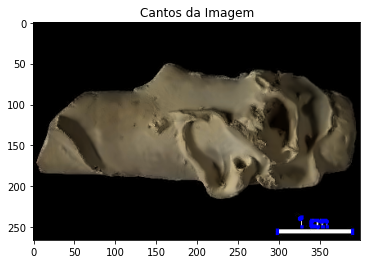

In [ ]:
canto = cv.dilate(canto,None)
teste[canto>0.01*canto.max()]=[0,0,255]
plt.title("Cantos da Imagem")
plt.imshow(teste)

##Quantização de cores

In [ ]:
z = sem_ruido.reshape((-1,3))
z = np.float32(z)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret, label ,center=cv.kmeans(z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [ ]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((sem_ruido.shape))

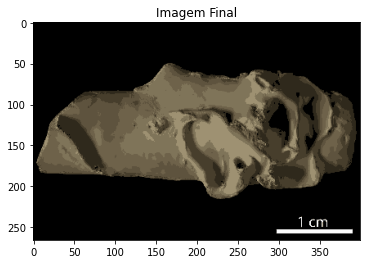

In [ ]:
plt.title("Imagem Final")
plt.imshow(res2)

##Salvando imagem

In [ ]:
res2 = cv.cvtColor(res2, cv.COLOR_BGR2RGB)
cv.imwrite("/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Annelida/Teste.jpg", res2)

True